<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-лишнего-столбца" data-toc-modified-id="Удаление-лишнего-столбца-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление лишнего столбца</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-возможных-аномалий-в-данных" data-toc-modified-id="Обработка-возможных-аномалий-в-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка возможных аномалий в данных</a></span></li><li><span><a href="#Подсчет-необходимых-статистических-данных" data-toc-modified-id="Подсчет-необходимых-статистических-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Подсчет необходимых статистических данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза:-&quot;Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются&quot;" data-toc-modified-id="Гипотеза:-&quot;Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются&quot;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"</a></span></li><li><span><a href="#Гипотеза:-&quot;Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов&quot;" data-toc-modified-id="Гипотеза:-&quot;Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов&quot;-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except OSError as err:
    print(err)

In [3]:
# Функция для обзора датафрейма
def overview_df(data):
    display(data.head())
    data.info()

In [4]:
overview_df(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
overview_df(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
overview_df(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
overview_df(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
overview_df(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод

При первичном изучении данных из файлов были выявлены следующие проблемы:
- наличие пропущенных значений в столбце `churn_date`;
- неверный тип данных в столбцах с датой: `churn_date`, `reg_date`, `call_date`, `session_date` и `message_date`;
- лишний столбец `Unnamed: 0` в таблице `internet`.

Устраним их в следующем шаге.

## Подготовка данных

### Удаление лишнего столбца

In [9]:
internet = internet.drop(columns=['Unnamed: 0'])
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Изменение типов данных

Заменим во всех столбцах с датой тип данных с `object` на `datetime`.

In [10]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
print(f"Тип данных столбца {users['churn_date'].name}: {users['churn_date'].dtype}")
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
print(f"Тип данных столбца {users['reg_date'].name}: {users['reg_date'].dtype}")
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print(f"Тип данных столбца {calls['call_date'].name}: {calls['call_date'].dtype}")
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print(f"Тип данных столбца {internet['session_date'].name}: {internet['session_date'].dtype}")
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print(f"Тип данных столбца {messages['message_date'].name}: {messages['message_date'].dtype}")

Тип данных столбца churn_date: datetime64[ns]
Тип данных столбца reg_date: datetime64[ns]
Тип данных столбца call_date: datetime64[ns]
Тип данных столбца session_date: datetime64[ns]
Тип данных столбца message_date: datetime64[ns]


### Обработка возможных аномалий в данных

Выведем количества уникальных значений, содержащихся в столбцах `duration` и `mb_used`. Сообщения измеряются только их количеством, поэтому там нечего просматривать. Также построим гистограммы.

In [11]:
calls['duration'].value_counts().head(10)

0.00    39613
4.49      142
5.50      142
6.15      141
6.38      141
4.92      139
8.41      138
5.45      138
5.05      138
5.25      137
Name: duration, dtype: int64

In [12]:
internet['mb_used'].value_counts().head(10)

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
513.25        8
199.11        8
292.14        8
466.85        8
304.20        8
Name: mb_used, dtype: int64

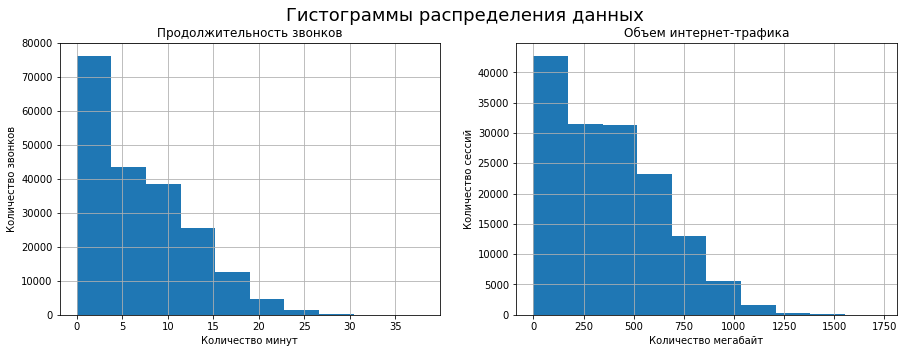

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Гистограммы распределения данных', fontsize=18)
calls['duration'].hist(ax=axs[0])
axs[0].set_title('Продолжительность звонков')
axs[0].set_xlabel('Количество минут')
axs[0].set_ylabel('Количество звонков')
internet['mb_used'].hist(ax=axs[1])
axs[1].set_title('Объем интернет-трафика')
axs[1].set_xlabel('Количество мегабайт')
axs[1].set_ylabel('Количество сессий')
plt.show()

Видно, что значительную часть в звонках и интернет-сессиях составляют звонки с нулевой продолжительностью и сессии с нулем потраченных мегабайтов данных соответственно.

В примечаниях к выполнению проекта было указано, что звонки с нулевой продолжительностью - это пропущенные звонки, и их не нужно удалять. Они влияют лишь на количество звонков за месяц. Можно по-разному считать количество, но это не имеет большого значения в рамках данного проекта, поэтому я решила включать их в подсчет.

Насчет нулевых интернет-сессий ничего не было указано, однако могу предположить, что такие сессии могли возникать, когда пользователь включил передачу данных, а затем, никуда не зайдя, снова ее выключил - соответственно, никакая часть трафика из пакета не была потрачена. В рамках данного проекта они также не оказывают никакого влияния на результаты исследования, так как потраченный трафик за месяц считается суммированием всех интернет-сессий в этом месяце, поэтому я решила также оставить их.

### Подсчет необходимых статистических данных

Поскольку для подсчета данных в разрезе по месяцам нам важен только месяц, в который было совершено то или иное действие, оставим в столбцах `call_date`, `session_date` и `message_date` только его номер.

In [14]:
calls['call_month'] = calls['call_date'].dt.month
display(calls['call_month'].head())
internet['session_month'] = internet['session_date'].dt.month
display(internet['session_month'].head())
messages['message_month'] = messages['message_date'].dt.month
display(messages['message_month'].head())

0     7
1     8
2     6
3     9
4    12
Name: call_month, dtype: int64

0    11
1     9
2     6
3     8
4     9
Name: session_month, dtype: int64

0     6
1    10
2     8
3     6
4    12
Name: message_month, dtype: int64

Теперь воспользуемся сводными таблицами, чтобы для каждого пользователя помесячно рассчитать необходимую статистику.

- **количество сделанных звонков и израсходованных минут разговора по месяцам**

*Примечание: поскольку количество минут компанией "Мегалайн" при каждом звонке округляется в большую сторону, применим сначала к столбцу с продолжительностью разговоров в таблице `calls` метод `ceil`.*

In [16]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
groupby_calls = (
    calls
    .groupby(['user_id', 'call_month'])
    .agg({'user_id': 'count', 'duration': 'sum'})
)
groupby_calls.rename(columns={'user_id': 'count_calls', 'duration': 'sum_duration'}, inplace=True)
groupby_calls.head(10)

count_calls  sum_duration
user_id call_month                           
1000    5                    22           159
        6                    43           172
        7                    47           340
        8                    52           408
        9                    58           466
        10                   57           350
        11                   43           338
        12                   46           333
1001    11                   59           430
        12                   63           414

- **количество отправленных сообщений по месяцам**

In [17]:
groupby_messages = (
    messages
    .groupby(['user_id', 'message_month'])
    .agg({'user_id': 'count'})
)
groupby_messages.rename(columns={'user_id': 'count_messages'}, inplace=True)
groupby_messages.head(10)

count_messages
user_id message_month                
1000    5                          22
        6                          60
        7                          75
        8                          81
        9                          57
        10                         73
        11                         58
        12                         70
1002    6                           4
        7                          11

- **объем израсходованного интернет-трафика по месяцам**

*Примечание: поскольку общая сумма трафика за месяц в мегабайтах округляется вверх до ближайшего целого числа гигабайт, переведем объемы трафика в гигабайты, разделив значения на 1024, и округлим в большую сторону методом `ceil`.*

In [18]:
groupby_internet = (
    internet
    .groupby(['user_id', 'session_month'])
    .agg({'mb_used': 'sum'})
)
groupby_internet['mb_used'] = np.ceil(groupby_internet['mb_used'] / 1024).astype('int')
groupby_internet.rename(columns={'mb_used': 'sum_gb_used'}, inplace=True)
groupby_internet.head(10)

sum_gb_used
user_id session_month             
1000    5                        3
        6                       23
        7                       14
        8                       14
        9                       15
        10                      15
        11                      15
        12                      10
1001    11                      18
        12                      14

- **помесячная выручка с каждого пользователя**

Для удобства расчетов объединим сводные таблицы в одну методом `join`, а затем добавим столбец с выручкой. При объединении в таблице появятся пропуски - заполним их значением `0`, так как пропуск означает отсутствие некоторого действия в том или ином месяце (отсутствие звонков, сообщений, выходов в интернет).

In [19]:
stats_by_month = groupby_calls.join([groupby_messages, groupby_internet], how='outer').fillna(0).astype('int').reset_index()
stats_by_month.rename(columns={'level_0': 'user_id', 'level_1': 'month'}, inplace=True)
stats_by_month = stats_by_month.merge(users[['user_id', 'tariff']], on='user_id')
stats_by_month.head(10)

,user_id,month,count_calls,sum_duration,count_messages,sum_gb_used,tariff
0,1000,5,22,159,22,3,ultra
1,1000,6,43,172,60,23,ultra
2,1000,7,47,340,75,14,ultra
3,1000,8,52,408,81,14,ultra
4,1000,9,58,466,57,15,ultra
5,1000,10,57,350,73,15,ultra
6,1000,11,43,338,58,15,ultra
7,1000,12,46,333,70,10,ultra
8,1001,11,59,430,0,18,smart
9,1001,12,63,414,0,14,smart


Напишем функцию для обработки строк, рассчитывающую сумму, уплаченную пользователем в тот или иной месяц.

In [20]:
def get_month_revenue(row):
    duration = row['sum_duration']
    over_duration = 0
    messages = row['count_messages']
    over_messages = 0
    traffic = row['sum_gb_used']
    over_traffic = 0
    tariff = row['tariff']
    
    if tariff == 'smart':
        if (duration - tariffs['minutes_included'][0]) > 0:
            over_duration = duration - tariffs['minutes_included'][0]
            
        if (messages - tariffs['messages_included'][0]) > 0:
            over_messages = messages - tariffs['messages_included'][0]
            
        if (traffic - tariffs['mb_per_month_included'][0] / 1024) > 0:
            over_traffic = traffic - tariffs['mb_per_month_included'][0] / 1024
            
        return (tariffs['rub_per_minute'][0] * over_duration + 
                tariffs['rub_per_message'][0] * over_messages + 
                tariffs['rub_per_gb'][0] * over_traffic + 
                tariffs['rub_monthly_fee'][0])
    
    if (duration - tariffs['minutes_included'][1]) > 0:
        over_duration = duration - tariffs['minutes_included'][1]
        
    if (messages - tariffs['messages_included'][1]) > 0:
        over_messages = messages - tariffs['messages_included'][1]
        
    if (traffic - tariffs['mb_per_month_included'][1] / 1024) > 0:
        over_traffic = traffic - tariffs['mb_per_month_included'][1] / 1024
        
    return (tariffs['rub_per_minute'][1] * over_duration + 
            tariffs['rub_per_message'][1] * over_messages + 
            tariffs['rub_per_gb'][1] * over_traffic + 
            tariffs['rub_monthly_fee'][1])

stats_by_month['month_fee'] = stats_by_month.apply(get_month_revenue, axis=1).astype('int')
stats_by_month.head(10)

,user_id,month,count_calls,sum_duration,count_messages,sum_gb_used,tariff,month_fee
0,1000,5,22,159,22,3,ultra,1950
1,1000,6,43,172,60,23,ultra,1950
2,1000,7,47,340,75,14,ultra,1950
3,1000,8,52,408,81,14,ultra,1950
4,1000,9,58,466,57,15,ultra,1950
5,1000,10,57,350,73,15,ultra,1950
6,1000,11,43,338,58,15,ultra,1950
7,1000,12,46,333,70,10,ultra,1950
8,1001,11,59,430,0,18,smart,1150
9,1001,12,63,414,0,14,smart,550


### Вывод

На этапе подготовки данных к анализу были проделаны следующие действия:
- удален лишний столбец `Unnamed: 0` в таблице `internet`;
- изменен тип данных в столбцах с датой на `datetime`;
- созданы сводные таблицы с необходимыми статистическими данными:
    1. количество сделанных звонков и израсходованных минут разговора по месяцам
    2. количество отправленных сообщений по месяцам
    3. объем израсходованного интернет-трафика по месяцам
- сводные таблицы объединены в одну;
- рассчитана помесячная выручка с каждого пользователя и добавлен в таблицу соответствующий столбец.

Пропуски в столбце `churn_date` не были заполнены, поскольку этот столбец не нужен для дальнейшего анализа, он носит лишь информационный характер.

## Анализ данных

Просмотрим числовое описание данных о пользователях различных тарифов.

In [21]:
smart_stats = stats_by_month.query('tariff == "smart"')
smart_stats.drop(columns=['user_id', 'month']).describe()

,count_calls,sum_duration,count_messages,sum_gb_used,month_fee
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,58.463437,417.934948,33.384029,16.328847,1289.973531
std,25.939858,190.313730,28.227876,5.747061,818.404367
min,0.000000,0.000000,0.000000,0.000000,550.000000
25%,40.000000,282.000000,10.000000,13.000000,550.000000
50%,60.000000,422.000000,28.000000,17.000000,1023.000000
75%,76.000000,545.000000,51.000000,20.000000,1750.000000
max,198.000000,1435.000000,143.000000,38.000000,6770.000000


In [22]:
ultra_stats = stats_by_month.query('tariff == "ultra"')
ultra_stats.drop(columns=['user_id', 'month']).describe()

,count_calls,sum_duration,count_messages,sum_gb_used,month_fee
count,985.000000,985.000000,985.000000,985.000000,985.000000
mean,73.392893,526.623350,49.363452,19.494416,2070.152284
std,43.916853,317.606098,47.804457,9.853511,376.187114
min,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,41.000000,284.000000,6.000000,12.000000,1950.000000
50%,74.000000,518.000000,38.000000,19.000000,1950.000000
75%,104.000000,752.000000,79.000000,27.000000,1950.000000
max,244.000000,1673.000000,224.000000,49.000000,4800.000000


Среднее количество и стандартное отклонение для всех величин уже представлены в таблицах. Рассчитаем отдельно дисперсию. Укажем в вызове функции параметр `ddof=1`, так как мы имеем в распоряжении лишь выборку данных.

In [23]:
np.var(smart_stats.drop(columns=['user_id', 'month']), ddof=1)

count_calls          672.876243
sum_duration       36219.315784
count_messages       796.812958
sum_gb_used           33.028705
month_fee         669785.708006
dtype: float64

In [24]:
np.var(ultra_stats.drop(columns=['user_id', 'month']), ddof=1)

count_calls         1928.689990
sum_duration      100873.633397
count_messages      2285.266143
sum_gb_used           97.091686
month_fee         141516.745079
dtype: float64

Построим гистограммы распределения данных в столбцах `sum_duration`, `count_messages` и `sum_gb_used` - количества минут, сообщений и гигабайт в месяц соответственно - для пользователей каждого тарифного плана. Укажем в параметрах вызова функции `hist` параметр `density=True`, чтобы построить плотностные гистограммы. Площади прямоугольников на гистограмме будут показывать вероятность того, что некоторый пользователь потратил такой объем услуг (минут, сообщений или гигабайт), входящий в этот промежуток.

In [25]:
def plot_hist(col_smart, col_ultra, bins):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    col_smart.hist(bins=bins, density=True, ax=axs[0])
    col_ultra.hist(bins=bins, density=True, ax=axs[1])
    axs[0].set_title('Тариф Smart')
    axs[1].set_title('Тариф Ultra')
    for i in range(2):
        axs[i].set_xlabel('Количество', fontsize=12)
        axs[i].set_ylabel('Плотность частоты', fontsize=12)
    plt.subplots_adjust(wspace=0.5)

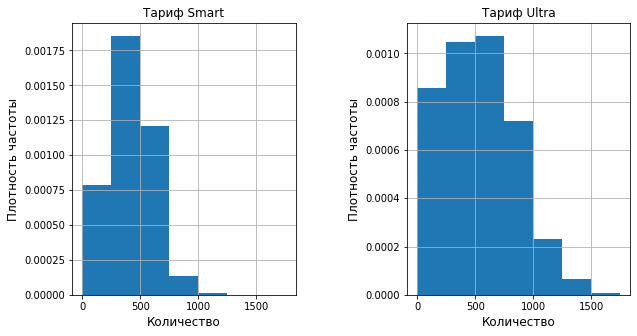

In [26]:
plot_hist(smart_stats['sum_duration'], ultra_stats['sum_duration'], np.arange(0, 1751, 250))
fig.suptitle('Гистограммы распределения пользователей тарифов по количеству потраченных минут в месяц', fontsize=16)
plt.show()

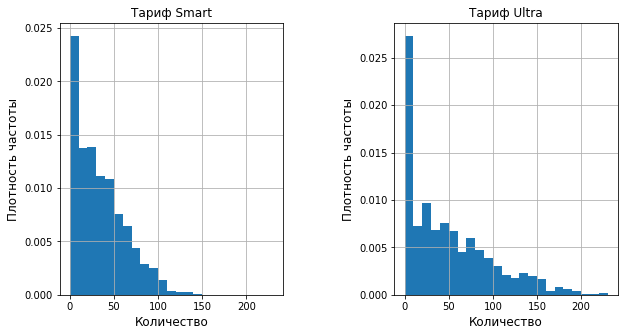

In [27]:
plot_hist(smart_stats['count_messages'], ultra_stats['count_messages'], np.arange(0, 231, 10))
fig.suptitle('Гистограммы распределения пользователей тарифов по количеству потраченных сообщений в месяц', fontsize=16)
plt.show()

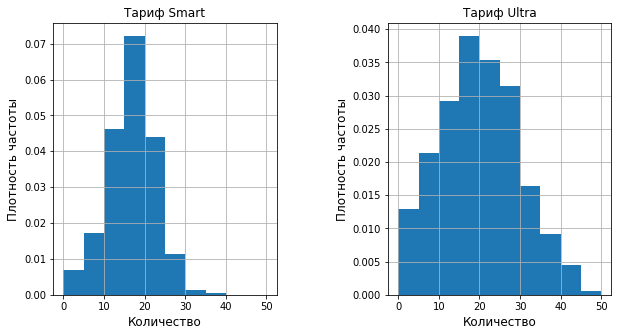

In [28]:
plot_hist(smart_stats['sum_gb_used'], ultra_stats['sum_gb_used'], np.arange(0, 51, 5))
fig.suptitle('Гистограммы распределения пользователей тарифов по количеству потраченных гигабайт в месяц', fontsize=16)
plt.show()

### Вывод

Исходя из анализа числового описания данных и гистограмм, можно сделать следующие выводы:
1. В среднем в месяц пользователи тарифа "Smart" тратят 418 минут, 34 ссобщения и 17 гигабайт, в то время как пользователи "Ultra" - 527 минут, 50 сообщений и 20 гигабайт интернета;
2. Дисперсия и стандартное отклонение величин в тарифе "Ultra" больше, чем в тарифе "Smart";
3. Никто из пользователей тарифа "Ultra" в 2018-ом году не выходил за лимит минут и сообщений - только около 15-20% людей вышли за лимит пакета интернета;
4. Среди клиентов, использующих тариф "Smart", около 35% потратили больше минут, чем включено в тариф; чуть более 25% вышли за лимит сообщений; а вот интернета не хватает подавляющему большинству - примерно две трети клиентов докупали гигабайты интернета;
5. Сообщениями одинаково неактивно пользуются клиенты обоих тарифов - об этом говорит длинная "свеча" на гистограммах в районе нуля.

## Проверка гипотез

Для проверки гипотез используем t-тест: будем проверять равенство среднего двух генеральных совокупностей по взятым из них выборкам (пользователи тарифа "Smart" и тарифа "Ultra"). Для этого сначала необходимо сформулировать нулевую и альтернативную гипотезы.

### Гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

**Нулевая гипотеза:** "Средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»".

**Альтернативная гипотеза:** "Средняя выручка пользователей тарифа «Ультра» отличается от средней выручки пользователей тарифа «Смарт»".

Для подтверждения исходной гипотезы необходимо, чтобы нулевая гипотеза была отвергнута в пользу альтернативной.

In [29]:
from scipy import stats as st
alpha = .01
results_1 = st.ttest_ind(smart_stats['month_fee'],
                         ultra_stats['month_fee'],
                         equal_var=False) # указываем, т.к. дисперсии не равны (из шага 3)
print('p-значение:', results_1.pvalue)
if results_1.pvalue < alpha:
    print('Нулевая гипотеза отвергнута в пользу альтернативной.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 4.2606313931076085e-250
Нулевая гипотеза отвергнута в пользу альтернативной.


Исходная гипотеза подтвердилась, причем было получено очень маленькое значение p-value. Это говорит о том, что выручки очень сильно различаются.

In [30]:
stats_by_month.pivot_table(index='tariff', values='month_fee', aggfunc=['mean', 'median'])

,mean,median
,month_fee,month_fee
tariff,,
smart,1289.973531,1023
ultra,2070.152284,1950


Из сводной таблицы видно, что в среднем с одного пользователя тарифа "Ultra" компания получает 2070 рублей, в то время как с одного пользователя "Smart" - 1290 рублей. Эти значения немного выше медианных: для тарифа "Ultra" это означает, что есть люди, которым не хватает пакета, включенного в тариф (в данном случае пакета интернета), так как медиана равна ежемесячной плате за тариф; для тарифа "Smart" же это значит, что больше людей переплачивают больше медианного значения, которое и так больше ежемесячной платы почти на 500 рублей.

### Гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

**Нулевая гипотеза:** "Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов".

**Альтернативная гипотеза:** "Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов".

Для подтверждения исходной гипотезы необходимо, чтобы нулевая гипотеза была отвергнута в пользу альтернативной.
Сначала необходимо добавить в таблицу `stats_by_month` информацию о городе пользователя.

In [31]:
stats_by_month = stats_by_month.merge(users[['user_id', 'city']], on='user_id')
stats_by_month.head(10)

,user_id,month,count_calls,sum_duration,count_messages,sum_gb_used,tariff,month_fee,city
0,1000,5,22,159,22,3,ultra,1950,Краснодар
1,1000,6,43,172,60,23,ultra,1950,Краснодар
2,1000,7,47,340,75,14,ultra,1950,Краснодар
3,1000,8,52,408,81,14,ultra,1950,Краснодар
4,1000,9,58,466,57,15,ultra,1950,Краснодар
5,1000,10,57,350,73,15,ultra,1950,Краснодар
6,1000,11,43,338,58,15,ultra,1950,Краснодар
7,1000,12,46,333,70,10,ultra,1950,Краснодар
8,1001,11,59,430,0,18,smart,1150,Москва
9,1001,12,63,414,0,14,smart,550,Москва


In [32]:
alpha = .01
results_2 = st.ttest_ind(stats_by_month.query('city == "Москва"')['month_fee'],
                         stats_by_month.query('city != "Москва"')['month_fee'],
                         equal_var=False)
print('p-значение:', results_2.pvalue)
if results_2.pvalue < alpha:
    print('Нулевая гипотеза отвергнута в пользу альтернативной.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу.


Получили очень большое значение `p-value = 0.53`, то есть чуть более чем в 50% случаев из генеральной совокупности можно получить такую выборку при условии, что нулевая гипотеза верна. Отсюда можно сделать вывод, что исходная гипотеза не подтвердилась - даже если средние выручки и отличаются, то разница незначительна.

### Вывод

Была проведена проверка статистических гипотез, по итогам которой:
- гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" подтвердилась, причем выручки различаются очень сильно: в среднем с одного пользователя тарифа "Ultra" компания получает 2070 рублей, в то время как с одного пользователя "Smart" - 1290 рублей;
- гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" не подтвердилась: выручка с московских клиентов компании не сильно отличается (то есть разница статистически незначима) от выручки с клиентов из других регионов.

## Общий вывод

Результат статистического анализа предоставленной выборки: **тариф "Ultra" лучше тарифа "Smart" как для клиентов, так и для компании.**

Преимущества для клиентов:
- большие пакеты услуг, включенные в тариф, позволяют не задумываться о том, что минуты, сообщения или гигабайты закончатся, к примеру, в середине месяца: по статистике, клиенты "Ultra" не успевают израсходовать пакеты минут и сообщений за месяц, а интернет докупают намного меньше людей, так как большинству хватает стандартного пакета;
- даже если какой-то пакет будет израсходован, для тарифа "Ultra" предусмотрены более дешевые условия использования сверх пакетов: в среднем в месяц клиенты переплачивают всего 120 рублей против 740 рублей у клиентов "Smart".

Преимущества для компании:
- с одного пользователя тарифа "Ultra" прибыль в месяц в среднем равна 2070 рублей против 1290 рублей у тарифа "Smart";
- более высокая лояльность клиентов за отсутствие больших переплат сверх тарифа - никто не любит платить больше, чем нужно, все любят стабильность и прозрачность.

## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  исправлены прочие ошибки в данных
- [x]  есть пояснение, в каких столбцах исправлены ошибки, какие это ошибки и почему исправлены
- [x]  посчитано для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам
- [x]  посчитано для каждого пользователя: количество отправленных сообщений по месяцам
- [x]  посчитано для каждого пользователя: объем израсходованного интернет-трафика по месяцам
- [x]  посчитано для каждого пользователя: помесячная выручка
- [x]  описано поведение клиентов оператора, исходя из выборки
- [x]  дан ответ на вопрос: "Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?"
- [x]  выполнено задание: "Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения."
- [x]  проверена гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается."
- [x]  проверена гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов."
- [x]  есть пояснение, как были сформулированы нулевая и альтернативная гипотезы
- [x]  есть пояснение, какой критерий был использован для проверки гипотез и почему
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод